In [30]:
# standard libraries
import pandas as pd
import numpy as np
import re
import os
from IPython.display import Image
import sklearn
import time
import matplotlib.pyplot as plt
import csv
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
# csv file name
filename = "log2.csv"

In [17]:

# initializing the titles and rows list
fields = []
rows = []

# reading csv file
with open(filename, 'r') as csvfile:
	# creating a csv reader object
	csvreader = csv.reader(csvfile)
	
	# extracting field names through first row
	fields = next(csvreader)

	# extracting each data row one by one
	for row in csvreader:
		rows.append(row)

	# get total number of rows
	print("Total no. of rows: %d"%(csvreader.line_num))

# printing the field names
print('Field names are:' + ', '.join(field for field in fields))




Total no. of rows: 65533
Field names are:Source Port, Destination Port, NAT Source Port, NAT Destination Port, Action, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received


In [18]:
# convert data set into dataframe
df = pd.read_csv(r"log2.csv")

In [19]:
# assign dependent and independent variables
X = df[['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']]

In [20]:
y = df['Action']

In [28]:
# data pre-processing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [33]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)


In [35]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [36]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier(loss='log')

In [37]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.98


/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


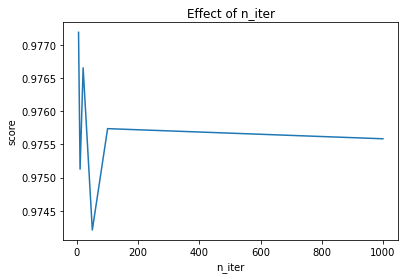

In [38]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [39]:
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM with SGD training: {stop - start}s")

start = time.time()
clf = SVC(kernel='linear')
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM without SGD training: {stop - start}s")

Training time for linear SVM with SGD training: 0.14249587059020996s
Training time for linear SVM without SGD training: 42.90885400772095s


/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


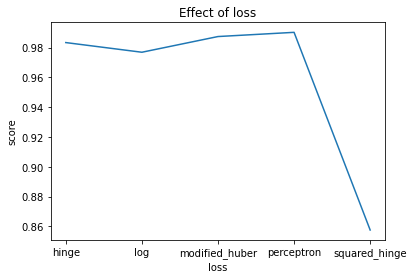

In [40]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [41]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(trainX, trainY)

print(grid.best_params_) 

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning:

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning:

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning:

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning:

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning:

{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'none'}


most suitable hyper parameters
{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'none'}

In [42]:
grid_predictions = grid.predict(testX) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.99


Inspired by https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/
https://realpython.com/gradient-descent-algorithm-python/